In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

students = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

### 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

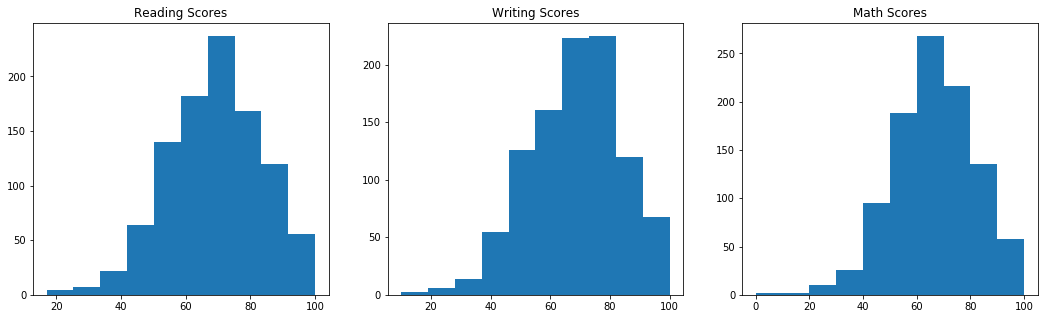

In [5]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.hist(students["reading score"])
plt.title("Reading Scores")

plt.subplot(1,3,2)
plt.hist(students["writing score"])
plt.title("Writing Scores")

plt.subplot(1,3,3)
plt.hist(students["math score"])
plt.title("Math Scores")

plt.show()

The exam scores look normal, but may be skewed to the right. We can test for normality to know for sure. 

In [9]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(students["reading score"])
norm_stats = normaltest(students["reading score"])

print("Jarque-Bera test statistics for reading scores is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for reading scores is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
print("\n")

jb_stats = jarque_bera(students["writing score"])
norm_stats = normaltest(students["writing score"])

print("Jarque-Bera test statistics for writing scores is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for writing scores is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
print("\n")

jb_stats = jarque_bera(students["math score"])
norm_stats = normaltest(students["math score"])

print("Jarque-Bera test statistics for math scores is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for math scores is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics for reading scores is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics for reading scores is 11.11741279628622 and p value is 0.003853758403576582


Jarque-Bera test statistics for writing scores is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics for writing scores is 13.606450837263859 and p value is 0.0011101885439899974


Jarque-Bera test statistics for math scores is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics for math scores is 15.408960513931822 and p value is 0.00045080293869937836


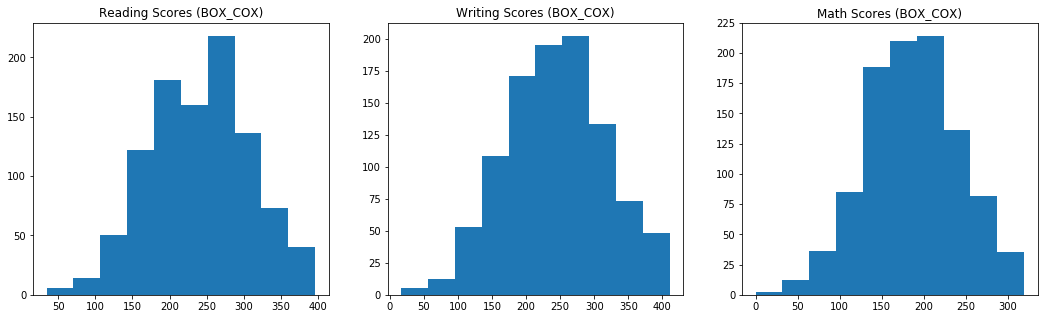

In [15]:
from scipy.stats import boxcox

reading_score_boxcox,_ = boxcox(students["reading score"])
writing_score_boxcox,_ = boxcox(students["writing score"])
## get rid of zero value
students["math score"] = students["math score"].replace(0, 1)
math_score_boxcox,_ = boxcox(students["math score"])

plt.figure(figsize=(18,5))

# histograms of the box-cox transformed data
plt.subplot(1,3,1)
plt.hist(reading_score_boxcox)
plt.title("Reading Scores (BOX_COX)")

plt.subplot(1,3,2)
plt.hist(writing_score_boxcox)
plt.title("Writing Scores (BOX_COX)")

plt.subplot(1,3,3)
plt.hist(math_score_boxcox)
plt.title("Math Scores (BOX_COX)")

plt.show()

After the boxcox transformations, the distributions look more normal and less skewed to the right. 

In [17]:
jb_stats = jarque_bera(reading_score_boxcox)
norm_stats = normaltest(reading_score_boxcox)

print("Jarque-Bera test statistics for reading scores boxcox is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for reading scores boxcox is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
print("\n")

jb_stats = jarque_bera(writing_score_boxcox)
norm_stats = normaltest(writing_score_boxcox)

print("Jarque-Bera test statistics for writing scores boxcox is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for writing scores boxcox is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
print("\n")

jb_stats = jarque_bera(math_score_boxcox)
norm_stats = normaltest(math_score_boxcox)

print("Jarque-Bera test statistics for math scores boxcox is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for math scores boxcox is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics for reading scores boxcox is 4.119778575331906 and p value is 0.1274680814024559
Normality test statistics for reading scores boxcox is 5.282274611852865 and p value is 0.07128015609575467


Jarque-Bera test statistics for writing scores boxcox is 4.746478090040098 and p value is 0.09317842784055597
Normality test statistics for writing scores boxcox is 6.267311355043339 and p value is 0.04355827085023795


Jarque-Bera test statistics for math scores boxcox is 0.9589875596660145 and p value is 0.6190967117358159
Normality test statistics for math scores boxcox is 0.9034198455639313 and p value is 0.636538788347859


### 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

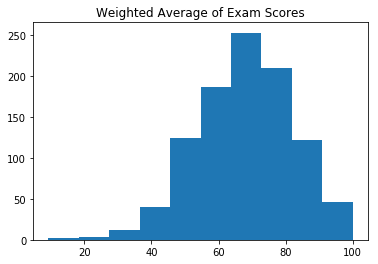

Jarque-Bera test statistics for weighted average is 15.299648399479786 and p value is 0.0004761278250606793
Normality test statistics for weighted average is 15.039484104419722 and p value is 0.0005422724257804356


In [22]:
students["exam total"] = (students['reading score'] + students['writing score'] + students['math score'])/3

plt.hist(students['exam total'])
plt.title("Weighted Average of Exam Scores")

plt.show()

jb_stats = jarque_bera(students['exam total'])
norm_stats = normaltest(students['exam total'])
print("Jarque-Bera test statistics for weighted average is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for weighted average is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

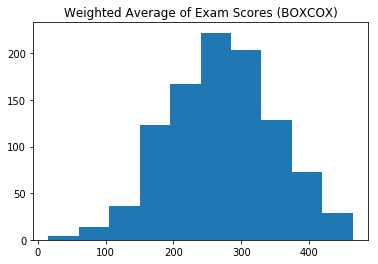

Jarque-Bera test statistics for weighted average boxcox is 2.4521724525282615 and p value is 0.29343878623193853
Normality test statistics for weighted average boxcox is 2.8029928520453686 and p value is 0.2462282257911406


In [23]:
exam_total_boxcox,_ = boxcox(students['exam total'])

plt.hist(exam_total_boxcox)
plt.title("Weighted Average of Exam Scores (BOXCOX)")

plt.show()

jb_stats = jarque_bera(exam_total_boxcox)
norm_stats = normaltest(exam_total_boxcox)
print("Jarque-Bera test statistics for weighted average boxcox is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for weighted average boxcox is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

After performing the boxcox transformation, the new variable appears to be more normally distributed. 

### 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

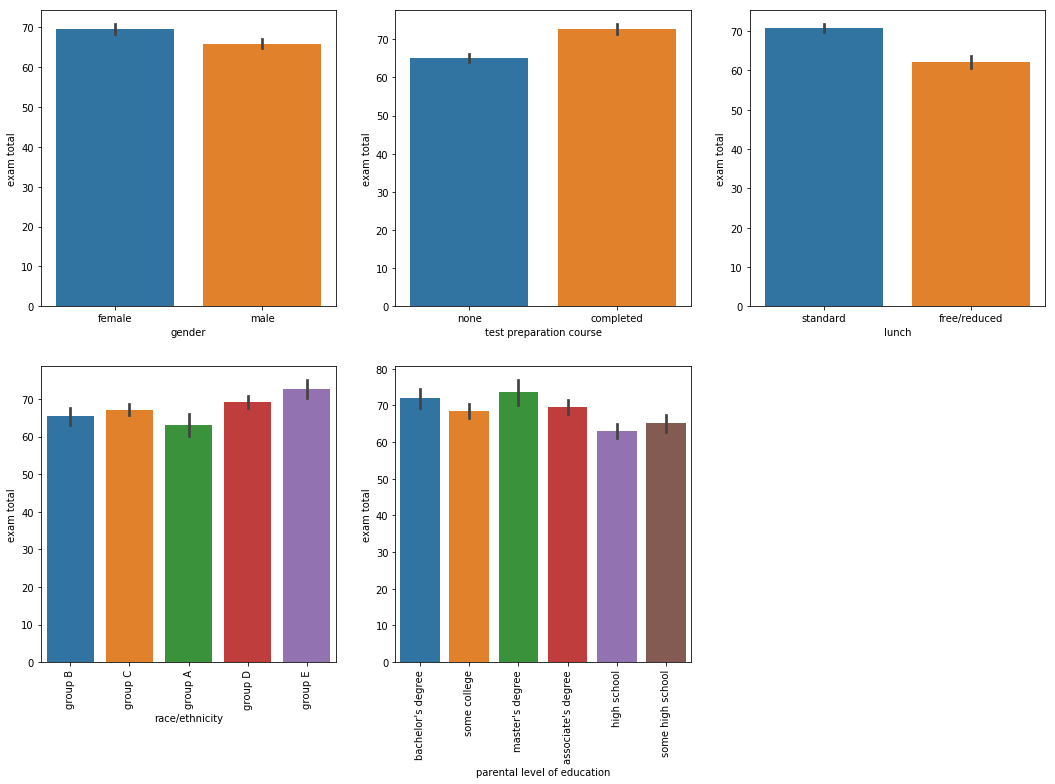

In [30]:
plt.figure(figsize=(18,12))

plt.subplot(2,3,1)
sns.barplot(students["gender"], students["exam total"])

plt.subplot(2,3,2)
sns.barplot(students["test preparation course"], students["exam total"])

plt.subplot(2,3,3)
sns.barplot(students["lunch"], students["exam total"])

plt.subplot(2,3,4)
sns.barplot(students["race/ethnicity"], students["exam total"])
plt.xticks(rotation = 90)

plt.subplot(2,3,5)
sns.barplot(students["parental level of education"], students["exam total"])
plt.xticks(rotation = 90)

plt.show()

Looking at all of the bar charts they all appear to show differences in terms of our newly created variable. We could perform t tests to confirm this but at first glance I think they all could be used as indicators of exam performance. Gender looks like the least reliable, but still may be significant. 